In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read csv files
sales_data = pd.read_csv('satis_verisi_5000.csv')
customer_data = pd.read_csv('musteri_verisi_5000_utf8.csv')

In [4]:
#First 10 value of sales data
sales_data.head(10)

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724
5,5,2023-06-20,P037,Fırın,Ev Aletleri,266.4,10,2664.0,7948
6,6,2023-08-22,P082,Defter,Kırtasiye,1290.3,8,10322.4,4184
7,7,2024-05-11,P063,Klima,Elektronik,627.78,17,10672.26,1522
8,8,2024-07-26,P010,Çanta,Giyim,749.39,8,5995.12,5504
9,9,2023-03-15,P082,Defter,Kırtasiye,193.65,16,3098.4,1722


In [5]:
#Sales dataset's statistics
sales_data.describe()

,Unnamed: 0,adet,musteri_id
count,5000.000000,5000.000000,5000.000000
mean,2499.500000,10.071800,5462.697000
std,1443.520003,5.461264,2593.182503
min,0.000000,1.000000,1004.000000
25%,1249.750000,5.000000,3202.000000
50%,2499.500000,10.000000,5404.000000
75%,3749.250000,15.000000,7710.000000
max,4999.000000,19.000000,9998.000000


In [6]:
#Sales dataset's information table
sales_data.info()

#When the sales data was examined, it was seen that the price and total sales values ​​were of object type. 
#In order to perform the desired operations, they must be float or int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5000 non-null   int64 
 1   tarih         5000 non-null   object
 2   ürün_kodu     5000 non-null   object
 3   ürün_adi      5000 non-null   object
 4   kategori      5000 non-null   object
 5   fiyat         5000 non-null   object
 6   adet          5000 non-null   int64 
 7   toplam_satis  5000 non-null   object
 8   musteri_id    5000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 351.7+ KB


In [7]:
#First 10 value of customer data
customer_data.head(10)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70
2,3902,Candeniz,Erkek,61,Konya,867.20
3,2080,Gözel,Erkek,64,Adana,2020.97
4,7901,Erdogan,Kadın,63,İstanbul,4334.16
5,1549,Tunçboğa,Erkek,63,Gaziantep,289.60
6,8958,Sonad,Kadın,39,İzmir,3912.39
7,8441,Merdi,Kadın,50,İzmir,3961.85
8,9843,Ünübol,Kadın,36,Adana,2112.75
9,6047,İsak,Erkek,19,İstanbul,687.91


In [8]:
#Customer dataset's statistics
customer_data.describe()

,musteri_id,yas,harcama_miktari
count,5000.000000,5000.000000,5000.000000
mean,5478.339000,43.704000,2554.959014
std,2605.860787,15.083086,1415.329144
min,1001.000000,18.000000,100.230000
25%,3188.250000,31.000000,1313.147500
50%,5441.500000,44.000000,2515.985000
75%,7738.750000,57.000000,3793.522500
max,9999.000000,69.000000,4999.440000


In [9]:
#Customer dataset's information table
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


TASK 1 - DATA CLEANING AND MANIPULATION

In [10]:
#Analyze missing data for both table
print("Missing values in Customer Data:\n", customer_data.isnull().sum())
print("Missing values in Sales Data:\n", sales_data.isnull().sum())

#It appears that there are no null values ​​before any changes are made to the datasets.

Missing values in Customer Data:
 musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64
Missing values in Sales Data:
 Unnamed: 0      0
tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64


In [11]:
sales_data["fiyat"] = pd.to_numeric(sales_data["fiyat"], errors="coerce")   #The object data type of the "fiyat" column was changed to float
sales_data["toplam_satis"] = pd.to_numeric(sales_data["toplam_satis"], errors="coerce") #The object data type of the "toplam_satis" column was changed to float

print("Null values for price: ", sales_data["fiyat"].isnull().sum())
print("Null values for total sale: ", sales_data["toplam_satis"].isnull().sum())

Null values for price:  42
Null values for total sale:  4


In [12]:
#Null values are filled with the median.
#When a change is desired directly in the dataframe, the inplace=True structure is used.
sales_data["fiyat"].fillna(sales_data["fiyat"].median(), inplace=True)
sales_data["toplam_satis"].fillna(sales_data["toplam_satis"].median(), inplace=True)

#Checked for null value again
print("Null values for price: ", sales_data["fiyat"].isnull().sum())
print("Null values for total sale: ", sales_data["toplam_satis"].isnull().sum())

Null values for price:  0
Null values for total sale:  0


In [13]:
############## Outliers Detection ################

In [14]:
#Outlier detection using IQR Based Filtering
def detect_outliers(df, column):
    #Quartiles value and IQR calculation
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                

    #Lower and upper bound detection
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR    

    #Find rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers detected in '{column}': {len(outliers)}")
    print(f"Lower bound= {lower_bound}")
    print(f"Upper bound= {upper_bound}")
    return outliers, lower_bound, upper_bound

In [15]:
piece_outliers, piece_lower, piece_upper = detect_outliers(sales_data, 'adet')
total_sales_outliers, total_sales_lower, total_sales_upper = detect_outliers(sales_data, 'toplam_satis')
spending_amount_outliers, spending_amount_lower, spending_amount_upper = detect_outliers(customer_data, 'harcama_miktari')
age_outliers, age_lower, age_upper = detect_outliers(customer_data, 'yas')

#According to these result, only total sales has outlier values


Outliers detected in 'adet': 0
Lower bound= -10.0
Upper bound= 30.0
Outliers detected in 'toplam_satis': 467
Lower bound= -15392.862500000007
Upper bound= 31771.257500000007
Outliers detected in 'harcama_miktari': 0
Lower bound= -2407.415
Upper bound= 7514.085
Outliers detected in 'yas': 0
Lower bound= -8.0
Upper bound= 96.0


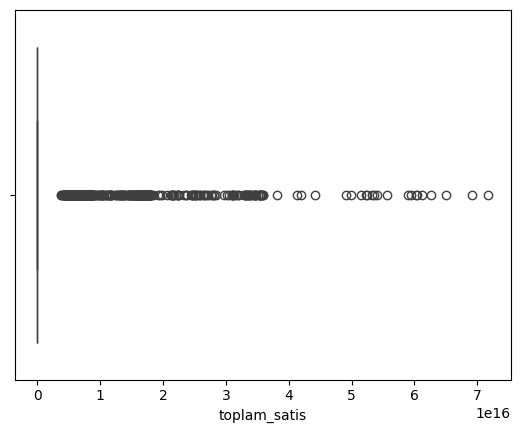

In [16]:
sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()

In [ ]:
def fix_total_satis(df):
    Q1 = df['toplam_satis'].quantile(0.25)  
    Q3 = df['toplam_satis'].quantile(0.75)  
    IQR = Q3 - Q1
#
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  

    #Identifying outliers in the "toplam_satis" column
    outliers = (df['toplam_satis'] < lower_bound) | (df['toplam_satis'] > upper_bound)

    #Fix outliers in "toplam_satis"
    df.loc[outliers, 'toplam_satis'] = df.loc[outliers, 'fiyat'] * df.loc[outliers, 'adet']

    return df, lower_bound, upper_bound

In [18]:
#With the winsorization function, outliers are not removed from the data set. Instead, it pulls outlier values ​​to the boundaries.
#If below the lower limit it equals lower_bound, if above the upper limit it equals upper_bound.
def winsorize_outliers(df, column, lower_bound, upper_bound):
   df[column] = df[column].apply(
        lambda x: min(max(x, lower_bound), upper_bound)
    )
   return df

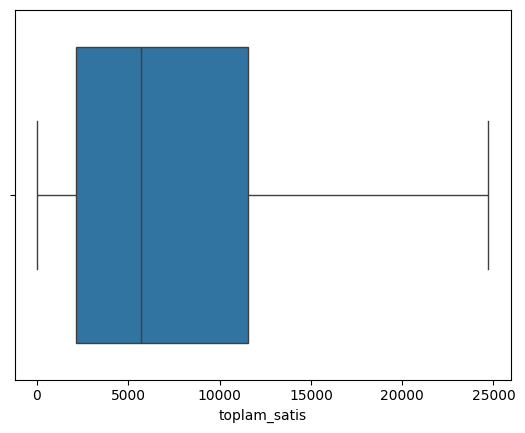

In [91]:
#The incorrect values ​​in the "total_sales" column were corrected. After these corrections, the values ​​that were still outliers were pulled into the range with the winsorization function.
#In this way, both the incorrect values ​​were corrected and no data loss occurred.
sales_data, total_sales_lower, total_sales_upper = fix_total_satis(sales_data)  
sales_data = winsorize_outliers(sales_data,"toplam_satis", total_sales_lower, total_sales_upper)  

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()

In [20]:
############## Merge Datasets ################

In [21]:
#Merge datasets
merged_data = pd.merge(sales_data, customer_data, on="musteri_id", how="inner")


In [22]:
#First 5 value in merged data
merged_data.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.90,9225,Masume,Kadın,35,İstanbul,3588.15
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955,Fenni,Kadın,64,Konya,3742.46
2,2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367,Feyruz,Kadın,45,Bursa,197.55
3,3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300.92,2869,Ülke,Kadın,43,İstanbul,3662.18
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724,Tonguç,Erkek,41,Bursa,2536.20


In [23]:
#Save merged dataset
merged_data.to_csv("merged_data.csv", index=False)

TASK 2: TIME SERIES ANALYSIS

In [24]:
#Since the data type was changed in the time series analysis, analyses were performed by creating copies. 
#Thus, the original data set was preserved.

time_series_data = sales_data.copy()    #Create a copy of the original dataset for time-series analysis

time_series_data["tarih"] = pd.to_datetime(time_series_data["tarih"])   #Convert date column to datetime format

#Since time-based operations cannot be performed when the dates are not correct, conversion was made to the appropriate format(datetime).

In [25]:
#Start and end date value of sales data
start_date = time_series_data["tarih"].min()
end_date = time_series_data["tarih"].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2022-11-06 00:00:00
End date: 2024-11-05 00:00:00


In [26]:
#Dates of the first and last sales days of each month
monthly_first_last_days = time_series_data.groupby(time_series_data["tarih"].dt.to_period("M")).agg(
    first_day=("tarih", "min"),
    last_day=("tarih",  "max")
)

#Names of the first and last sales days of each month
monthly_first_last_days["first_day_name"] = monthly_first_last_days["first_day"].dt.day_name()
monthly_first_last_days["last_day_name"] = monthly_first_last_days["last_day"].dt.day_name()

print(f"First and Last Sales Days of each Month \n{monthly_first_last_days}")

First and Last Sales Days of each Month 
         first_day   last_day first_day_name last_day_name
tarih                                                     
2022-11 2022-11-06 2022-11-30         Sunday     Wednesday
2022-12 2022-12-01 2022-12-31       Thursday      Saturday
2023-01 2023-01-01 2023-01-31         Sunday       Tuesday
2023-02 2023-02-01 2023-02-28      Wednesday       Tuesday
2023-03 2023-03-01 2023-03-31      Wednesday        Friday
2023-04 2023-04-01 2023-04-30       Saturday        Sunday
2023-05 2023-05-01 2023-05-31         Monday     Wednesday
2023-06 2023-06-01 2023-06-30       Thursday        Friday
2023-07 2023-07-01 2023-07-31       Saturday        Monday
2023-08 2023-08-01 2023-08-31        Tuesday      Thursday
2023-09 2023-09-01 2023-09-30         Friday      Saturday
2023-10 2023-10-01 2023-10-31         Sunday       Tuesday
2023-11 2023-11-01 2023-11-30      Wednesday      Thursday
2023-12 2023-12-01 2023-12-31         Friday        Sunday
2024-01 2024-01

In [27]:
#Weekly product sales quantity analysis for date
weekly_product_sales_quantity = time_series_data.resample("W", on="tarih")["adet"].sum() 
print(f"Weekly Product Sales Quantity \n{weekly_product_sales_quantity}")

Weekly Product Sales Quantity 
tarih
2022-11-06     57
2022-11-13    428
2022-11-20    455
2022-11-27    459
2022-12-04    518
             ... 
2024-10-13    522
2024-10-20    454
2024-10-27    641
2024-11-03    472
2024-11-10     72
Freq: W-SUN, Name: adet, Length: 106, dtype: int64


In [93]:
max_sales_week = weekly_product_sales_quantity.idxmax()  #Highest sales week
max_sales_value = weekly_product_sales_quantity.max()  #Highest sales amount


min_sales_week = weekly_product_sales_quantity.idxmin()  #Lowest sales week
min_sales_value = weekly_product_sales_quantity.min()  #Lowest sales amount


print(f"Highest product sales week: {max_sales_week}")
print(f"Highest product sales amount: {max_sales_value}\n")

print(f"Lowest product sales week: {min_sales_week}")
print(f"Lowest product sales amount: {min_sales_value}")

Highest sales week: 2024-04-28 00:00:00
Highest sales amount: 744

Lowest sales week: 2022-11-06 00:00:00
Lowest sales amount: 57


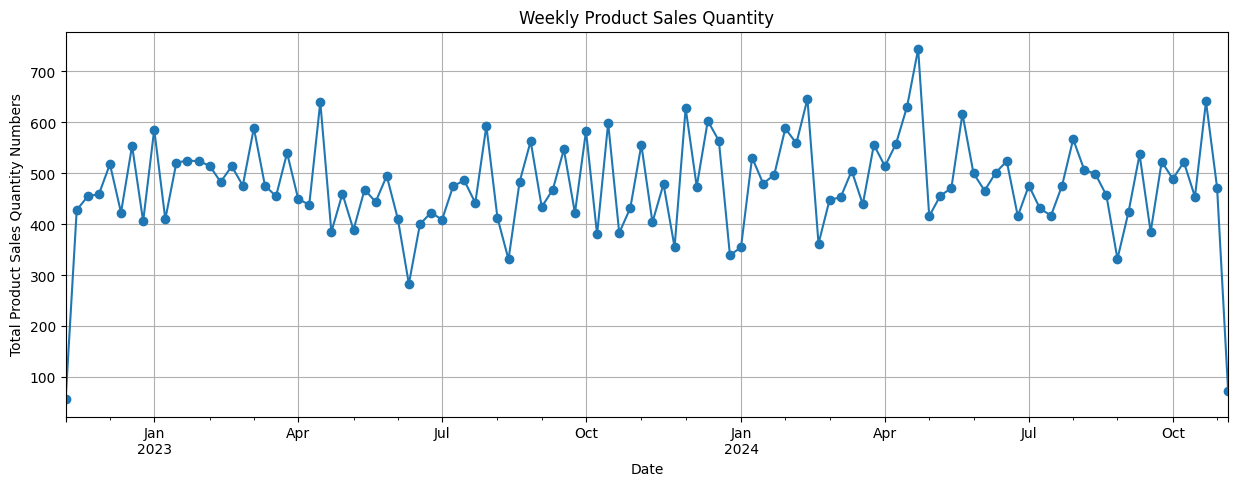

In [28]:
#Plot a line chart for weekly product sales quantity
weekly_product_sales_quantity.plot(kind="line",title="Weekly Product Sales Quantity", figsize=(15, 5), marker="o")
plt.ylabel("Total Product Sales Quantity Numbers")
plt.xlabel("Date")
plt.grid()
plt.show()

In [29]:
#Weekly total sales amount analysis for date
weekly_total_sales = time_series_data.resample("W", on="tarih")["toplam_satis"].sum()     #resample function is used for time series data
print(f"Weekly Total Sales Amount \n {weekly_total_sales}")

Weekly Total Sales Amount 
 tarih
2022-11-06     22763.97
2022-11-13    283830.07
2022-11-20    345111.47
2022-11-27    336645.23
2022-12-04    377958.55
                ...    
2024-10-13    312159.84
2024-10-20    332119.84
2024-10-27    406160.87
2024-11-03    335001.97
2024-11-10     70866.81
Freq: W-SUN, Name: toplam_satis, Length: 106, dtype: float64


In [94]:
max_total_sales_week = weekly_total_sales.idxmax()  #Highest sales week
max_total_sales_value = weekly_total_sales.max()  #Highest sales amount

min_total_sales_week = weekly_total_sales.idxmin()  #Lowest sales week
min_total_sales_value = weekly_total_sales.min()  #Lowest sales amount

print(f"Highest total sales week: {max_total_sales_week}")
print(f"Highest total sales amount: {max_total_sales_value}\n")

print(f"Lowest total sales week: {min_total_sales_week}")
print(f"Lowest total sales amount: {min_total_sales_value}")

Highest total sales week: 2024-04-28 00:00:00
Highest total sales amount: 668963.85

Lowest total sales week: 2022-11-06 00:00:00
Lowest total sales amount: 22763.97


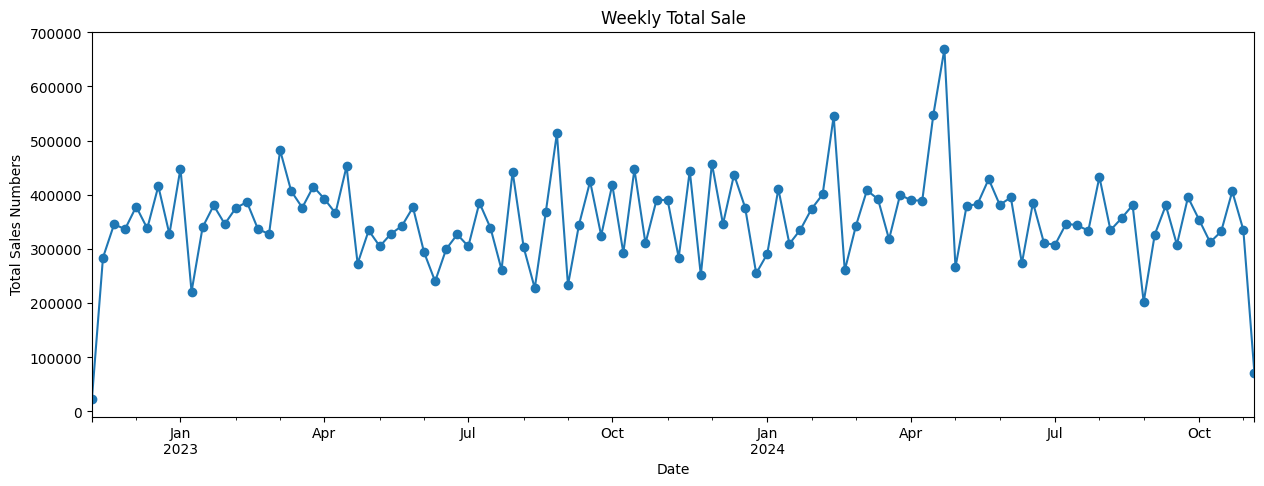

In [30]:
#Plot a line chart for weekly total sales amount
weekly_total_sales.plot(kind="line", title="Weekly Total Sale",  marker="o", figsize=(15,5))
plt.ylabel("Total Sales Numbers")
plt.xlabel("Date")
plt.show()

In [ ]:
#Monthly product sales quantity for date
monthly_product_sales_quantity = time_series_data.resample("ME", on="tarih")["adet"].sum()  
print(f"Monthly Product Sales Quantity \n {monthly_product_sales_quantity}")

In [98]:
max_product_sales_month = monthly_product_sales_quantity.idxmax()  #Highest sales month
max_product_sales_value = monthly_product_sales_quantity.max()  #Highest sales amount

min_product_sales_month = monthly_product_sales_quantity.idxmin()  #Lowest sales month
min_product_sales_value = monthly_product_sales_quantity.min()  #Lowest sales amount

print(f"Highest total product sales month: {max_product_sales_month}")
print(f"Highest total product sales amount: {max_product_sales_value}\n")

print(f"Lowest total product sales month: {min_product_sales_month}")
print(f"Lowest total product sales amount: {min_product_sales_value}")

Highest total product sales month: 2024-04-30 00:00:00
Highest total product sales amount: 2539

Lowest total product sales month: 2024-11-30 00:00:00
Lowest total product sales amount: 251


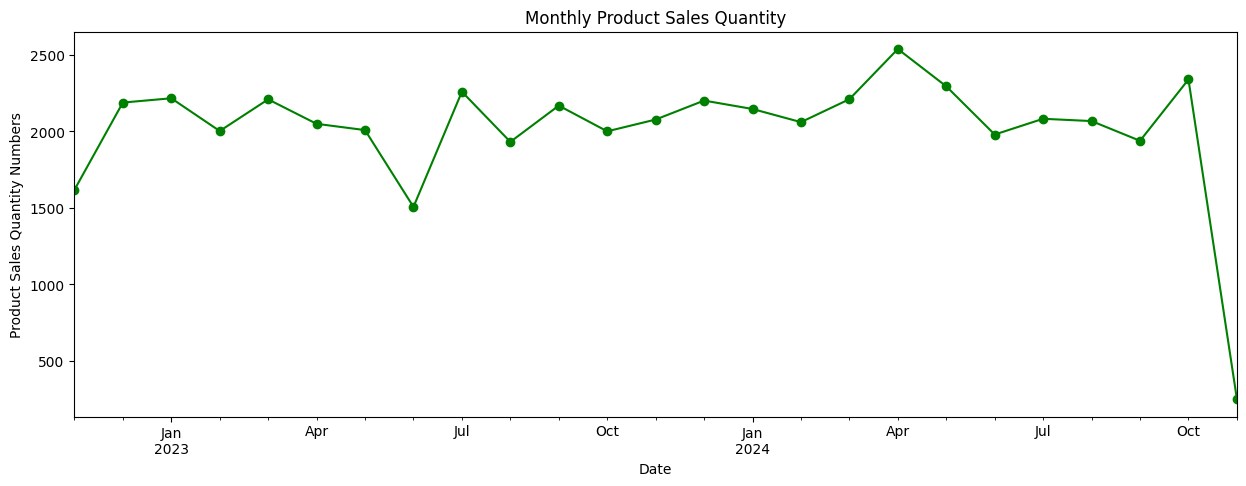

In [32]:
#Plot a line chart for monthly product sales quantity
monthly_product_sales_quantity.plot(kind="line", title="Monthly Product Sales Quantity", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Product Sales Quantity Numbers")
plt.show()

In [33]:
#Since the numbers in the total sales column in the data set are large, scientific notation was turned off for easy reading.
pd.options.display.float_format = '{:,.2f}'.format

#Monthly total sales for date
monthly_total_sales = time_series_data.resample("ME", on="tarih")["toplam_satis"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Total Sales \n {monthly_total_sales}")

Monthly Total Sales 
 tarih
2022-11-30   1,137,842.88
2022-12-31   1,719,156.95
2023-01-31   1,422,855.49
2023-02-28   1,471,878.05
2023-03-31   1,832,710.68
2023-04-30   1,520,891.41
2023-05-31   1,494,659.87
2023-06-30   1,143,600.54
2023-07-31   1,646,041.80
2023-08-31   1,447,479.57
2023-09-30   1,614,864.47
2023-10-31   1,604,671.23
2023-11-30   1,544,643.77
2023-12-31   1,586,192.43
2024-01-31   1,537,842.76
2024-02-29   1,523,329.06
2024-03-31   1,723,997.50
2024-04-30   2,040,868.98
2024-05-31   1,733,992.48
2024-06-30   1,422,489.87
2024-07-31   1,515,923.99
2024-08-31   1,512,403.47
2024-09-30   1,451,512.19
2024-10-31   1,566,775.01
2024-11-30     211,246.16
Freq: ME, Name: toplam_satis, dtype: float64


In [99]:
max_total_sales_month = monthly_total_sales.idxmax()  #Highest sales month
max_total_sales_value = monthly_total_sales.max()  #Highest sales amount

min_total_sales_month = monthly_total_sales.idxmin()  #Lowest sales month
min_total_sales_value = monthly_total_sales.min()  #Lowest sales amount

print(f"Highest total sales month: {max_total_sales_month}")
print(f"Highest total sales amount: {max_total_sales_value}\n")

print(f"Lowest total sales month: {min_total_sales_month}")
print(f"Lowest total sales amount: {min_total_sales_value}")

Highest total sales month: 2024-04-30 00:00:00
Highest total sales amount: 2040868.98

Lowest total sales month: 2024-11-30 00:00:00
Lowest total sales amount: 211246.16


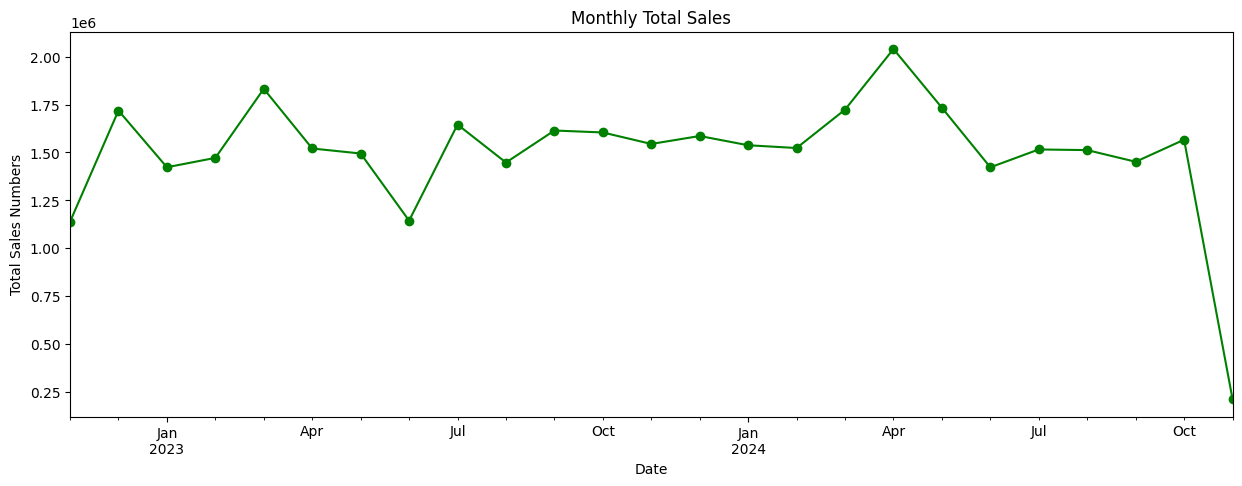

In [103]:
#Plot a line chart for monthly total sales
monthly_total_sales.plot(kind="line", title="Monthly Total Sales", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Total Sales Numbers")
plt.show()

In [106]:
#Find last month
last_month = time_series_data.resample("M", on="tarih").last()  # Son ayı al

#Date range of last month
last_month_start = last_month.index[-1].replace(day=1)  #First day of last month
last_month_end = last_month.index[-1]  #Last day of last month

#Calculating how many days are in the last month
days_in_last_month = (last_month_end - last_month_start).days

print(f"First day of last month: {last_month_start}")
print(f"Last day of last month: {last_month_end}")
print(f"There are {days_in_last_month} days in the last month")


#Sales have always decreased in the last month and weeks. Therefore, the number of days in the last month was checked. 
#The last month is 29 days. So the reason for the decrease is not the lack of data in the month.

First day of last month: 2024-11-01 00:00:00
Last day of last month: 2024-11-30 00:00:00
There are 29 days in the last month


In [35]:
#The amount of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_diff = monthly_product_sales_quantity.diff()  
print(f"Monthly Product Sales Quantity Changes \n {monthly_product_sales_quantity_diff}")


#Since there is no previous data in the first month, the change rate appears as NaN

Monthly Product Sales Quantity Changes 
 tarih
2022-11-30         NaN
2022-12-31      571.00
2023-01-31       28.00
2023-02-28     -214.00
2023-03-31      207.00
2023-04-30     -160.00
2023-05-31      -41.00
2023-06-30     -502.00
2023-07-31      753.00
2023-08-31     -328.00
2023-09-30      237.00
2023-10-31     -168.00
2023-11-30       77.00
2023-12-31      124.00
2024-01-31      -55.00
2024-02-29      -86.00
2024-03-31      150.00
2024-04-30      328.00
2024-05-31     -244.00
2024-06-30     -315.00
2024-07-31      103.00
2024-08-31      -15.00
2024-09-30     -129.00
2024-10-31      401.00
2024-11-30   -2,089.00
Freq: ME, Name: adet, dtype: float64


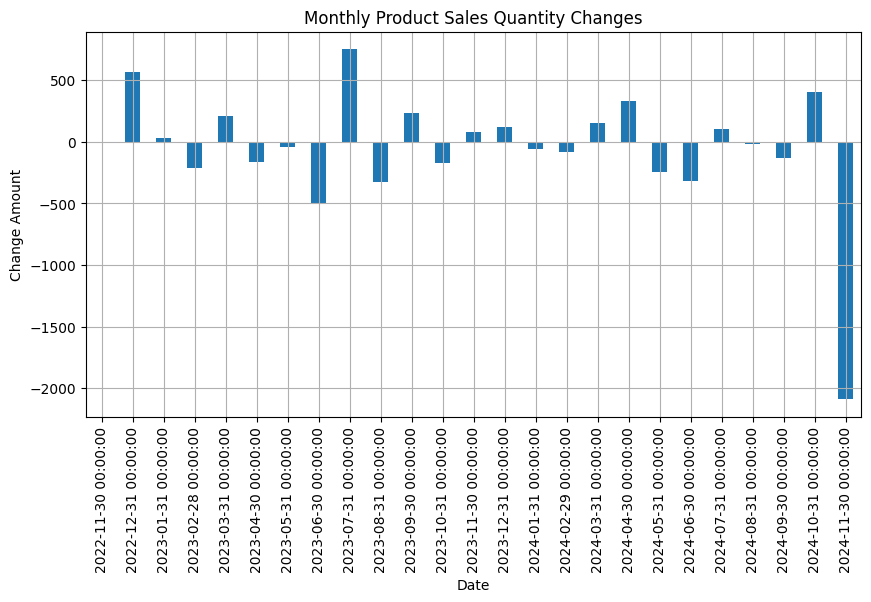

In [36]:
#Plot a bar chart for monthly product sales quantity changes
monthly_product_sales_quantity_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Product Sales Quantity Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [37]:
#The percentage change of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_percentage = monthly_product_sales_quantity.pct_change() * 100
print(f"Monthly Sales Unit Change Percentage \n {monthly_product_sales_quantity_percentage}")

#Since there is no previous data in the first month, the change rate appears as NaN

Monthly Sales Unit Change Percentage 
 tarih
2022-11-30      NaN
2022-12-31    35.29
2023-01-31     1.28
2023-02-28    -9.65
2023-03-31    10.33
2023-04-30    -7.24
2023-05-31    -2.00
2023-06-30   -24.99
2023-07-31    49.97
2023-08-31   -14.51
2023-09-30    12.27
2023-10-31    -7.75
2023-11-30     3.85
2023-12-31     5.97
2024-01-31    -2.50
2024-02-29    -4.01
2024-03-31     7.28
2024-04-30    14.83
2024-05-31    -9.61
2024-06-30   -13.73
2024-07-31     5.20
2024-08-31    -0.72
2024-09-30    -6.24
2024-10-31    20.68
2024-11-30   -89.27
Freq: ME, Name: adet, dtype: float64


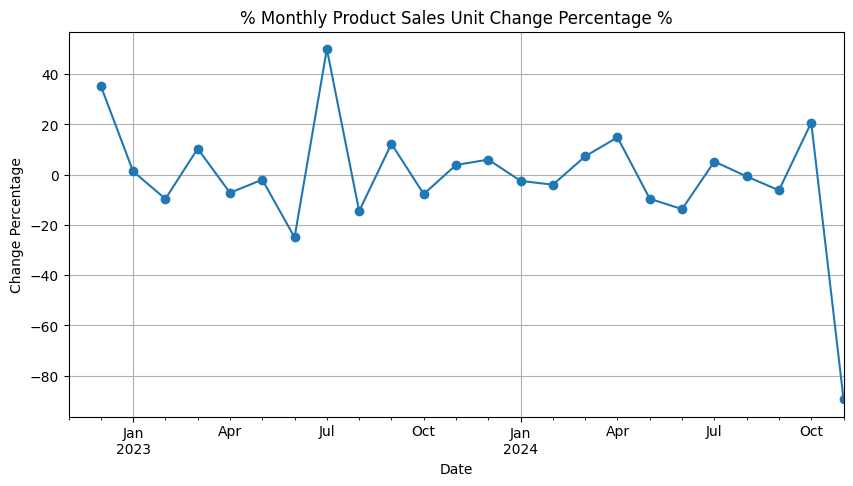

In [38]:
#Plot a line chart for monthly product sales quantity percentage
monthly_product_sales_quantity_percentage.plot(kind="line", title="% Monthly Product Sales Unit Change Percentage %", marker="o", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Change Percentage")
plt.grid()
plt.show()

In [39]:
#The amount of increase or decrease compared to the previous month for total sales
monthly_total_sales_diff = monthly_total_sales.diff()  
print(f"Monthly Total Sale Changes \n {monthly_total_sales_diff}")

#Since there is no previous data in the first month, the change rate appears as NaN

Monthly Total Sale Changes 
 tarih
2022-11-30             NaN
2022-12-31      581,314.07
2023-01-31     -296,301.46
2023-02-28       49,022.56
2023-03-31      360,832.63
2023-04-30     -311,819.27
2023-05-31      -26,231.54
2023-06-30     -351,059.33
2023-07-31      502,441.26
2023-08-31     -198,562.23
2023-09-30      167,384.90
2023-10-31      -10,193.24
2023-11-30      -60,027.46
2023-12-31       41,548.66
2024-01-31      -48,349.67
2024-02-29      -14,513.70
2024-03-31      200,668.44
2024-04-30      316,871.48
2024-05-31     -306,876.50
2024-06-30     -311,502.61
2024-07-31       93,434.12
2024-08-31       -3,520.52
2024-09-30      -60,891.28
2024-10-31      115,262.82
2024-11-30   -1,355,528.85
Freq: ME, Name: toplam_satis, dtype: float64


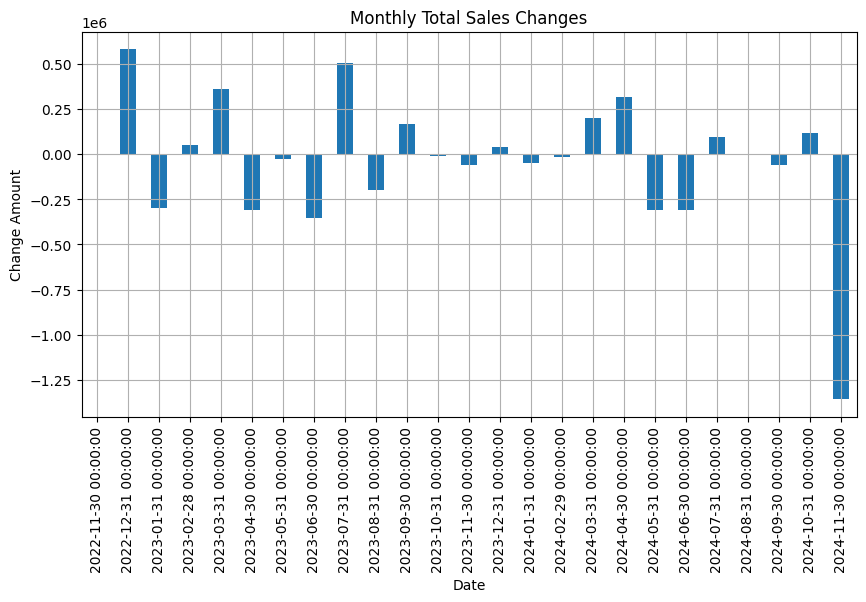

In [40]:
#Plot a bar chart for monthly total sales changes
monthly_total_sales_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Total Sales Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [41]:
#The percentage change of increase or decrease compared to the previous month for total sales
monthly_total_sales_percentage = monthly_total_sales.pct_change() * 100
print(f"Monthly Total Sales Changes Percentage \n {monthly_total_sales_percentage}")

Monthly Total Sales Changes Percentage 
 tarih
2022-11-30      NaN
2022-12-31    51.09
2023-01-31   -17.24
2023-02-28     3.45
2023-03-31    24.52
2023-04-30   -17.01
2023-05-31    -1.72
2023-06-30   -23.49
2023-07-31    43.94
2023-08-31   -12.06
2023-09-30    11.56
2023-10-31    -0.63
2023-11-30    -3.74
2023-12-31     2.69
2024-01-31    -3.05
2024-02-29    -0.94
2024-03-31    13.17
2024-04-30    18.38
2024-05-31   -15.04
2024-06-30   -17.96
2024-07-31     6.57
2024-08-31    -0.23
2024-09-30    -4.03
2024-10-31     7.94
2024-11-30   -86.52
Freq: ME, Name: toplam_satis, dtype: float64


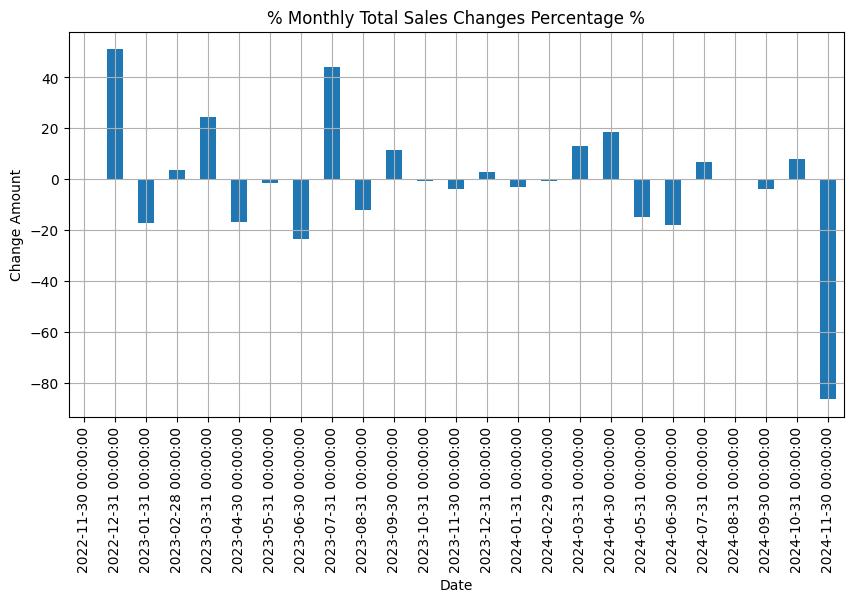

In [42]:
#Plot a bar chart for monthly total sales change percentage
monthly_total_sales_percentage.plot(kind="bar", figsize=(10, 5), title="% Monthly Total Sales Changes Percentage %")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

TASK 3 - Categorical and Numerical Analysis

In [43]:
##### Total sales by product category and the ratio of each category to all sales ####

In [44]:
#Analysis was done within the function to make the code readable and reusable
def analyze_product_category_sales(data, category_column, sales_column):

    #Total sales by product category
    product_category = data.groupby(category_column)[sales_column].sum()
    
    #Percentage of each category in total sales
    product_category_percentage = (product_category / product_category.sum()) * 100
    
    #Display results into a single table
    category_table = pd.DataFrame(
        {
            "Total sales by product category": product_category,
            "Percentage of each category": product_category_percentage
        }
    )
    
    return category_table

In [120]:
#Call the function
category_table = analyze_product_category_sales(sales_data, category_column="kategori", sales_column="toplam_satis")

print(category_table)

                 Total sales by product category  Percentage of each category
kategori                                                                     
Elektronik                         18,118,459.27                        48.51
Ev Aletleri                         3,783,836.58                        10.13
Giyim                               3,887,317.44                        10.41
Kırtasiye                           7,800,600.27                        20.89
Mutfak Ürünleri                     3,757,739.86                        10.06


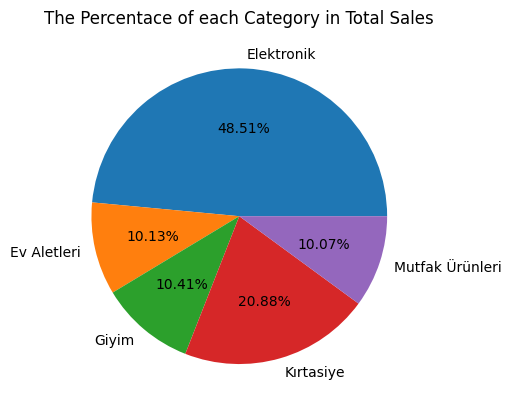

In [ ]:
plt.pie(
    category_table["Percentage of each category"], 
    labels=category_table.index, 
    autopct="%1.2f%%"
)

plt.title("The Percentace of each Category in Total Sales")
plt.show()

#According to the results in this section, the electronics category makes up the majority of sales. 
#With a percentage of 48.51%, this category makes up almost half of the sales.

In [47]:
#Total sales and percentage of each product in its category
def analyze_product_sales_by_category(data, category_column, product_column, sales_column):
 
    #Total sales by product and category
    product_sales = data.groupby([category_column, product_column])[sales_column].sum().reset_index()   #Fixed multiindex structure with reset_index()
    
    #Total sales by category
    category_sales = data.groupby(category_column)[sales_column].sum().reset_index()
    category_sales.rename(columns={sales_column: "category_total_sales"}, inplace=True)
    
    #Merge product sales with category sales
    combine_data = pd.merge(
        product_sales, 
        category_sales, 
        on=category_column
    )
    
    # Calculate percentage of each product within its category
    combine_data["% within category"] = (
        combine_data[sales_column] / combine_data["category_total_sales"] * 100
    )
    
    # Final table
    result = combine_data[[category_column, product_column, sales_column, "% within category"]]
    result.rename(
        columns={sales_column: "Total sales by product"}, 
        inplace=True
    )
    
    return result



In [48]:
# Call the function with relevant columns
product_table = analyze_product_sales_by_category(
    sales_data, 
    category_column="kategori", 
    product_column="ürün_adi", 
    sales_column="toplam_satis"
)

# Print the resulting table
print(product_table)

          kategori    ürün_adi  Total sales by product  % within category
0       Elektronik  Bilgisayar            3,498,532.41              19.27
1       Elektronik       Klima            3,355,930.17              18.48
2       Elektronik    Kulaklık            3,610,387.97              19.88
3       Elektronik       Mouse            3,748,044.42              20.64
4       Elektronik     Telefon            3,943,806.54              21.72
5      Ev Aletleri       Fırın            3,791,498.81             100.00
6            Giyim       Çanta            3,896,207.17             100.00
7        Kırtasiye      Defter            3,849,736.55              49.25
8        Kırtasiye       Kalem            3,966,306.97              50.75
9  Mutfak Ürünleri   Su Şişesi            3,767,419.60             100.00


In [49]:
#### Sales trends of customers will be analyzed according to their age groups ####

In [107]:
#Age groups were created for analysis. A copy was created to ensure that the original dataset was not corrupted.
age_data = merged_data.copy()

#First, the minimum and maximum age range limit in the dataset was checked.
min_age = age_data["yas"].min()
print(f"Minimum age: {min_age}")

max_age = age_data["yas"].max() 
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 69


In [108]:
#Bin annd labels age group
bins = [18, 26, 36, 51, 150]    #age groups
labels = ["18-25", "26-35", "36-50", "50+"]   #label groups

#Split customers by age groups
merged_data["yas"] = pd.cut(merged_data["yas"], bins=bins, labels=labels)

In [ ]:
#Total sales amount according to age groups
age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum()

#Product sales amount according to age groups
age_group_product_sales = merged_data.groupby("yas")["adet"].sum()

#Display results in a single table
age_sales_table = pd.DataFrame(
    {
    "Total Sales According to Age Group": age_group_sales,
    "Product Sales According to Age Group": age_group_product_sales
    }
)

age_sales_table

#The highest product sales were in the 50+ group.
#In general, sales rates decreased as the age group decreased.

,Total Sales According to Age Group,Product Sales According to Age Group
yas,,
18-25,"5,815,352.25",7666
26-35,"6,924,756.18",9514
36-50,"11,247,541.99",15133
50+,"12,667,770.55",17076


In [118]:
pivot_table = merged_data.pivot_table(
    values="toplam_satis", 
    index="yas", 
    columns="kategori", 
    aggfunc="sum", 
    fill_value=0
)

pivot_table

kategori,Elektronik,Ev Aletleri,Giyim,Kırtasiye,Mutfak Ürünleri
yas,,,,,
18-25,"2,887,290.29","606,748.17","546,433.88","1,138,115.91","636,764.00"
26-35,"3,427,011.89","680,367.80","680,764.22","1,436,648.58","699,963.69"
36-50,"5,344,730.87","1,153,983.23","1,311,150.37","2,371,669.16","1,066,008.36"
50+,"6,205,292.84","1,261,761.12","1,237,036.08","2,718,974.43","1,244,706.08"


In [112]:
#Total sales amount according to age / category groups
grouped_sales = merged_data.groupby(["yas", "kategori"])["toplam_satis"].sum().reset_index()

#Top category in every age group
top_category_by_age = grouped_sales.loc[grouped_sales.groupby("yas")["toplam_satis"].idxmax()]

print(f"Top Category by Age \n {top_category_by_age}")

Top Category by Age 
       yas    kategori  toplam_satis
0   18-25  Elektronik  2,887,290.29
5   26-35  Elektronik  3,427,011.89
10  36-50  Elektronik  5,344,730.87
15    50+  Elektronik  6,205,292.84


In [53]:
##### Analysis of male and female customers' spending #####

In [113]:
def analyze_gender_sales(data):
    #Total sales by gender
    gender_sales = data.groupby("cinsiyet")["toplam_satis"].sum()

    #Total spending amount by gender
    gender_spending = data.groupby("cinsiyet")["harcama_miktari"].sum()

    #Average spending amount by gender
    gender_spending_mean = data.groupby("cinsiyet")["harcama_miktari"].mean()
    
    #Total product sales quantity by gender
    gender_product_quantity = data.groupby("cinsiyet")["adet"].sum()

    result = {
        "Total Sales": gender_sales,
        "Total Spending": gender_spending,
        "Average Spending": gender_spending_mean,
        "Product Quantity": gender_product_quantity
    }
    
    return result

In [ ]:
#Call the function with the merged dataset
gender_analysis_results = analyze_gender_sales(merged_data)

#Print results
for key, value in gender_analysis_results.items():
    print(f"\n{key}:")
    print(value)

#According to total sales and spending amounts, it is seen that women buy more products.



Total Sales:
cinsiyet
Erkek   18,548,319.26
Kadın   18,879,551.35
Name: toplam_satis, dtype: float64

Total Spending:
cinsiyet
Erkek   6,348,599.97
Kadın   6,606,229.86
Name: harcama_miktari, dtype: float64

Average Spending:
cinsiyet
Erkek   2,571.32
Kadın   2,610.13
Name: harcama_miktari, dtype: float64

Product Quantity:
cinsiyet
Erkek    24900
Kadın    25459
Name: adet, dtype: int64


In [56]:
#The reason for the next 4 analyses being done outside the function: 
#These analyses were also working within the function, but since analyses were done in multiple categories, the table views were not clear. 
#Separate tables were examined one by one for better understanding analysis.

In [ ]:
#Spending amount by gender and age
gender_age_sales = merged_data.groupby(["yas","cinsiyet"])["harcama_miktari"].sum().unstack()
gender_age_sales

#According to these results, it seen that women shop more in all age groups except 26-35

cinsiyet,Erkek,Kadın
yas,,
18-25,"899,815.92","935,793.18"
26-35,"1,257,406.97","1,243,873.40"
36-50,"1,823,061.40","2,029,193.62"
50+,"2,245,822.79","2,275,568.60"


In [ ]:
#Highest spending for each gender and age group
max_spending_age_female = gender_age_sales["Kadın"].idxmax()
max_spending_age_male = gender_age_sales["Erkek"].idxmax()

#Spending amounts of the highest spending age groups
max_spending_female = gender_age_sales.loc[max_spending_age_female, "Kadın"]
max_spending_male = gender_age_sales.loc[max_spending_age_male, "Erkek"]

#Lowest spending for each gender and age group
min_spending_age_female = gender_age_sales["Kadın"].idxmin()
min_spending_age_male = gender_age_sales["Erkek"].idxmin()

#Spending amounts of the lowest spending age groups
min_spending_female = gender_age_sales.loc[min_spending_age_female, "Kadın"]
min_spending_male = gender_age_sales.loc[min_spending_age_male, "Erkek"]


#Print the results
print(f"The female age group that spends the most {max_spending_age_female} with a spending of {max_spending_female}.")
print(f"The male age group that spends the most {max_spending_age_male} with a spending of {max_spending_male}. \n")

print(f"The female age group that spends the least {min_spending_age_female} with a spending of {min_spending_female}.")
print(f"The male age group that spends the least {min_spending_age_male} with a spending of {min_spending_male}.")


The female age group that spends the most 50+ with a spending of 2275568.6.
The male age group that spends the most 50+ with a spending of 2245822.79. 

The female age group that spends the least 18-25 with a spending of 935793.18.
The male age group that spends the least 18-25 with a spending of 899815.92.


In [117]:
#Spending amount by gender and category

#Since there were multi index, the results were unstacked to make them easier to read in a table view.
gender_category_sales = merged_data.groupby(["cinsiyet", "kategori"])["harcama_miktari"].sum().unstack()
gender_category_sales

kategori,Elektronik,Ev Aletleri,Giyim,Kırtasiye,Mutfak Ürünleri
cinsiyet,,,,,
Erkek,"3,041,759.12","594,728.70","701,147.29","1,368,681.18","642,283.68"
Kadın,"3,285,005.35","677,770.35","654,266.72","1,331,978.60","657,208.84"


In [60]:
#Total product sales quantity by age and category
gender_product_sales = merged_data.groupby(["cinsiyet", "ürün_adi"])["adet"].sum().unstack()
gender_product_sales

#According to these analyses, the product category that women buy the most is phones. 
#The product that men buy the most is bags.

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
cinsiyet,,,,,,,,,,
Erkek,2322,2640,2220,2715,2075,2517,2395,2654,2468,2894
Kadın,2263,2562,2613,2585,2609,2421,2666,2605,2776,2359


TASK 4 - Advanced Data Manipulation

In [61]:
######## Customer spending by city #########

In [62]:
#Total sales by city
city_sales_amount = merged_data.groupby("sehir")["toplam_satis"].sum().sort_values(ascending=False)   #ascending=False pattern was used because it was sorted from most to least.
print(f"Total sales by city \n{city_sales_amount}\n")

#Total spending amount by city
city_spent_amount = merged_data.groupby("sehir")["harcama_miktari"].sum().sort_values(ascending=False)  #ascending=False pattern was used because it was sorted from most to least.
print(f"Total spending amount by city \n{city_spent_amount}")


Total sales by city 
sehir
Bursa       4,915,870.25
İzmir       4,893,612.02
Gaziantep   4,856,706.26
Antalya     4,702,154.17
Ankara      4,624,914.34
Konya       4,606,793.80
Adana       4,583,573.98
İstanbul    4,244,245.79
Name: toplam_satis, dtype: float64

Total spending amount by city 
sehir
Gaziantep   1,740,073.60
İzmir       1,739,145.40
Bursa       1,665,417.27
Ankara      1,649,167.77
Antalya     1,581,436.54
Konya       1,556,038.91
Adana       1,552,729.00
İstanbul    1,470,821.34
Name: harcama_miktari, dtype: float64


In [63]:
###### Average sales growth rate for each product in sales data ######

In [64]:
#Since the date column was converted to datetime format in Task 2, no format change was made again. So, time_series_data was used.
#Monthly groupings were also made in Task 2, but these were not by every product. They were by total sales. Therefore, the variables there were not used here.


#Total monthly sales by product
monthly_product_sales = time_series_data.groupby([time_series_data["tarih"].dt.to_period("M"), "ürün_adi"])["adet"].sum().unstack()
monthly_product_sales

#There is only one product code representing each product. 
#Therefore, the product name was preferred instead of the product code to make the table more easily understandable.

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
tarih,,,,,,,,,,
2022-11,116,211,140,149,149,120,139,153,273,168
2022-12,170,279,272,218,199,199,231,217,236,168
2023-01,216,168,242,273,236,153,281,159,228,261
2023-02,83,120,252,317,192,139,258,247,189,206
2023-03,285,248,185,248,188,289,175,190,163,239
2023-04,217,185,201,218,204,132,171,269,218,235
2023-05,189,207,116,158,215,177,242,202,190,313
2023-06,204,139,119,58,101,174,136,167,245,164
2023-07,190,218,263,240,200,230,201,210,325,183


In [65]:
#Monthly product sales change percentage
monthly_product_sales_change_percentage = monthly_product_sales.pct_change() * 100
monthly_product_sales_change_percentage

#Since there is no previous data in the first month, the change rate appears as NaN

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
tarih,,,,,,,,,,
2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12,46.55,32.23,94.29,46.31,33.56,65.83,66.19,41.83,-13.55,0.00
2023-01,27.06,-39.78,-11.03,25.23,18.59,-23.12,21.65,-26.73,-3.39,55.36
2023-02,-61.57,-28.57,4.13,16.12,-18.64,-9.15,-8.19,55.35,-17.11,-21.07
2023-03,243.37,106.67,-26.59,-21.77,-2.08,107.91,-32.17,-23.08,-13.76,16.02
2023-04,-23.86,-25.40,8.65,-12.10,8.51,-54.33,-2.29,41.58,33.74,-1.67
2023-05,-12.90,11.89,-42.29,-27.52,5.39,34.09,41.52,-24.91,-12.84,33.19
2023-06,7.94,-32.85,2.59,-63.29,-53.02,-1.69,-43.80,-17.33,28.95,-47.60
2023-07,-6.86,56.83,121.01,313.79,98.02,32.18,47.79,25.75,32.65,11.59


In [66]:
#Average sales growth rate for each product
average_monthly_product_sales_change = monthly_product_sales_change_percentage.mean()
average_monthly_product_sales_change

ürün_adi
Bilgisayar   16.17
Defter        9.21
Fırın         5.44
Kalem        11.63
Klima         2.13
Kulaklık      6.58
Mouse         4.52
Su Şişesi     2.10
Telefon      -2.02
Çanta         4.62
dtype: float64

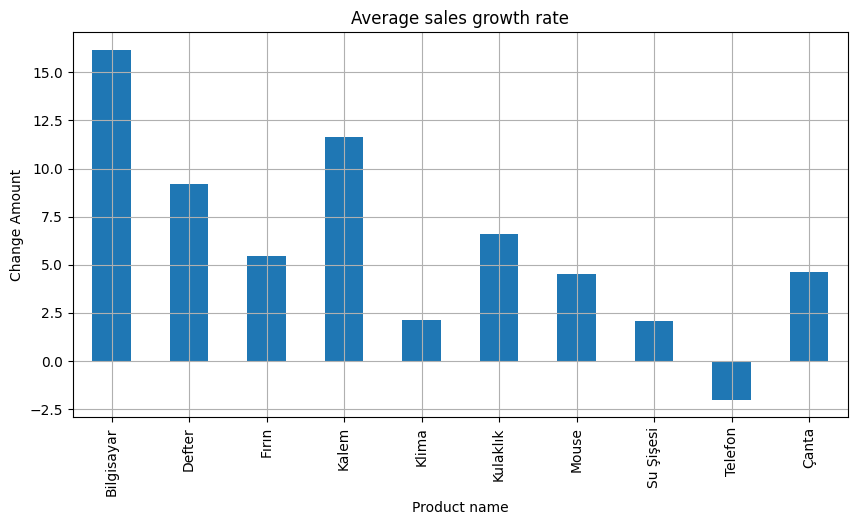

In [67]:
#Plot a bar chart for average sales growth rate
average_monthly_product_sales_change.plot(kind="bar", figsize=(10, 5), title="Average sales growth rate")
plt.ylabel("Change Amount")
plt.xlabel("Product name")
plt.grid()

In [68]:
####### Total monthly sales and change rates for each category #######

In [69]:
#Monthly total sales by category
monthly_category_sales = time_series_data.groupby([time_series_data["tarih"].dt.to_period("M"), "kategori"])["toplam_satis"].sum().unstack()
monthly_category_sales

kategori,Elektronik,Ev Aletleri,Giyim,Kırtasiye,Mutfak Ürünleri
tarih,,,,,
2022-11,"588,668.32","100,436.11","102,251.34","237,472.96","109,014.15"
2022-12,"792,905.26","222,368.37","143,161.02","408,440.74","152,281.56"
2023-01,"755,710.54","152,221.62","186,934.72","235,203.77","92,784.84"
2023-02,"583,636.23","204,978.75","158,263.31","388,099.32","136,900.44"
2023-03,"881,400.51","168,815.66","210,774.18","416,948.24","154,772.09"
2023-04,"731,750.45","131,482.91","152,373.42","312,278.68","193,005.95"
2023-05,"755,576.21","97,358.66","237,752.23","258,080.16","145,892.61"
2023-06,"683,614.60","91,566.36","109,444.67","182,090.56","76,884.35"
2023-07,"829,692.52","193,994.69","147,451.81","324,858.68","150,044.10"


In [70]:
#Monthly category sales change percentage
monthly_category_sales_change = monthly_category_sales.pct_change() * 100
monthly_category_sales_change

#Since there is no previous data in the first month, the change rate appears as NaN

kategori,Elektronik,Ev Aletleri,Giyim,Kırtasiye,Mutfak Ürünleri
tarih,,,,,
2022-11,NaN,NaN,NaN,NaN,NaN
2022-12,34.69,121.40,40.01,71.99,39.69
2023-01,-4.69,-31.55,30.58,-42.41,-39.07
2023-02,-22.77,34.66,-15.34,65.01,47.55
2023-03,51.02,-17.64,33.18,7.43,13.05
2023-04,-16.98,-22.11,-27.71,-25.10,24.70
2023-05,3.26,-25.95,56.03,-17.36,-24.41
2023-06,-9.52,-5.95,-53.97,-29.44,-47.30
2023-07,21.37,111.86,34.73,78.41,95.16


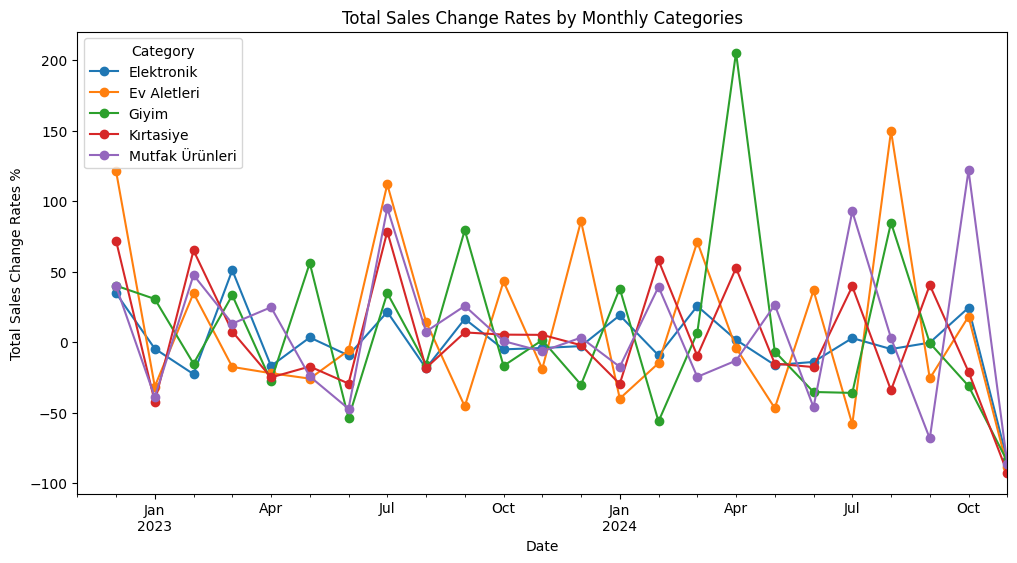

In [71]:
#Plot a line chart for monthly category sales change percentage
monthly_category_sales_change.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Total Sales Change Rates by Monthly Categories")
plt.xlabel("Date")
plt.ylabel("Total Sales Change Rates %")
plt.legend(title="Category", loc='upper left')
plt.show()


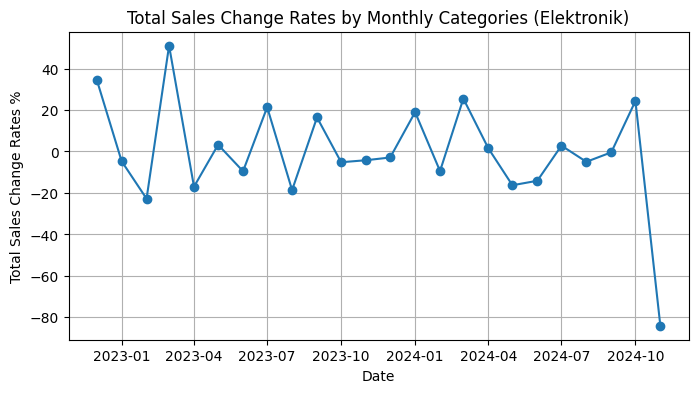

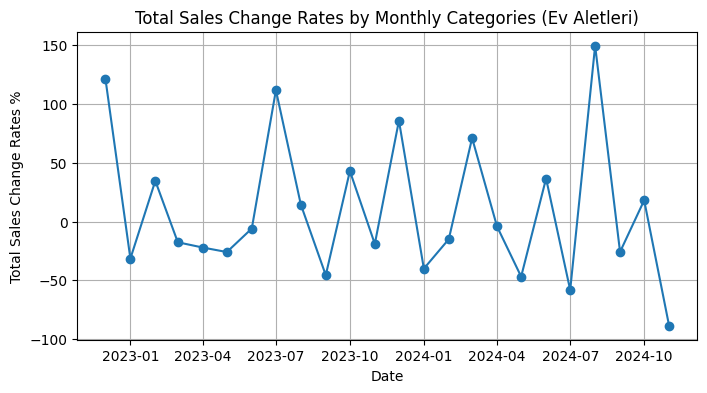

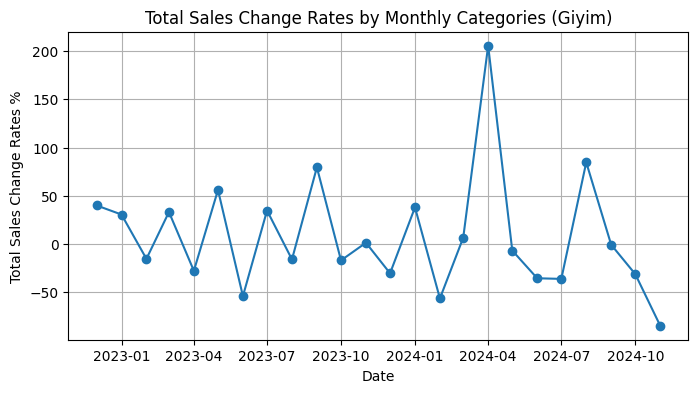

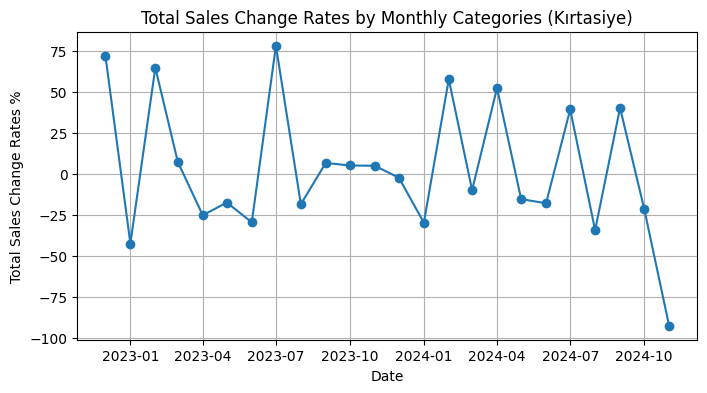

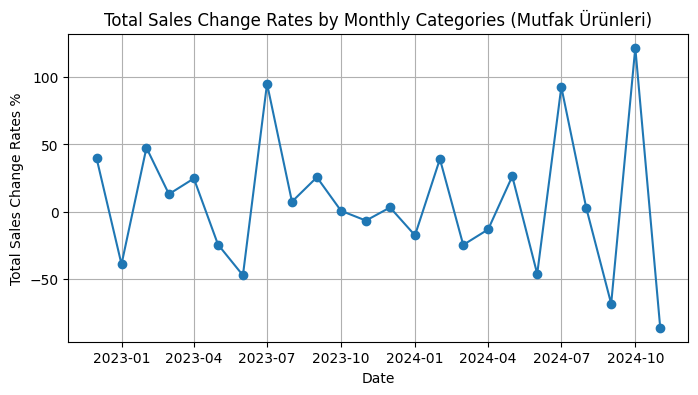

In [72]:
#Different graphs were drawn for each category to make the graph more readable.
monthly_category_sales_change.index = monthly_category_sales_change.index.to_timestamp()

categories = monthly_category_sales_change.columns

for category in categories:
    plt.figure(figsize=(8, 4))  
    plt.plot(
        monthly_category_sales_change.index,
        monthly_category_sales_change[category],
        marker='o', label=category
    )
    plt.title(f"Total Sales Change Rates by Monthly Categories ({category})")
    plt.xlabel("Date")
    plt.ylabel("Total Sales Change Rates %")
    plt.grid()
    plt.show()


TASK 5 - EXTRA

Pareto Analysis - Determine the products that 80% of sales.

In [73]:
def pareto_analysis(data, product_column, sales_column, threshold):

    #Total sales by product name
    product_sales = data.groupby(product_column)[sales_column].sum().sort_values(ascending=False)

    #Since Pareto analysis is performed in this section, cumulative total should be used. 
    #Products that contribute more are collected from the beginning and the percentage reached by sales is visible thanks to the cumulative total.
    cumulative_sales_percentage = (product_sales.cumsum() / product_sales.sum()) * 100

    #Filter products that reach the threshold
    pareto_products = product_sales[cumulative_sales_percentage <= threshold]

    return product_sales, pareto_products, cumulative_sales_percentage


In [74]:
#Perform pareto analysis function 
product_sales, pareto_products, cumulative_sales_percentage = pareto_analysis(sales_data, "ürün_adi", "toplam_satis", 80)

In [75]:
print(f"Product sales \n{product_sales}\n")  
print(f"Pareto products \n{pareto_products}")  

#According to these results, 7 pareto products is avaible

Product sales 
ürün_adi
Kalem        3,966,306.97
Telefon      3,943,806.54
Çanta        3,896,207.17
Defter       3,849,736.55
Fırın        3,791,498.81
Su Şişesi    3,767,419.60
Mouse        3,748,044.42
Kulaklık     3,610,387.97
Bilgisayar   3,498,532.41
Klima        3,355,930.17
Name: toplam_satis, dtype: float64

Pareto products 
ürün_adi
Kalem       3,966,306.97
Telefon     3,943,806.54
Çanta       3,896,207.17
Defter      3,849,736.55
Fırın       3,791,498.81
Su Şişesi   3,767,419.60
Mouse       3,748,044.42
Name: toplam_satis, dtype: float64


In [76]:
def pareto_plot(product_sales, cumulative_sales_percentage, scale, threshold=80):

    #Scale the sales data
    scaled_product_sales = product_sales / scale

    #Plot bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(scaled_product_sales.index, scaled_product_sales.values, label="Sales")

   #Plot Pareto line
    plt.plot(
        scaled_product_sales.index,
        cumulative_sales_percentage,
        color="red",
        marker="o",
        label="Cumulative Sales %"
    )

    #Labels and title
    plt.title(f"Pareto Analysis: Products Contributing to {threshold}% of Sales")
    plt.xlabel("Products")
    plt.ylabel(f"Cumulative Sales %")
    plt.legend()
    plt.show()


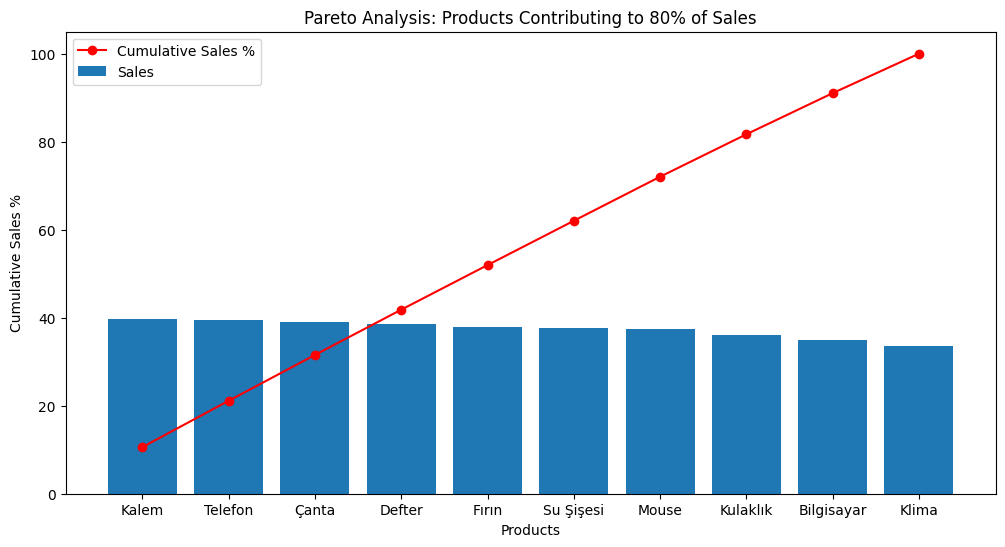

In [77]:
#Plot the Pareto chart
pareto_plot(product_sales, cumulative_sales_percentage, 100000)  #Scale adjustment was made to make the graph more clearly visible.

#The detailed comments of the results of this graph is written in the report.


Cohort Analysis - Analyze the purchasing habits of customers.

This analysis was done in detail. Customer repeat purchase rates, gender, age and product categories were used.

In [78]:
def cohort_analysis(data, date_column, customer_id_column):
    #Convert datetime 
    data[date_column] = pd.to_datetime(data[date_column])
    
    #Each customer's first purchase date
    data["cohort_month"] = data.groupby(customer_id_column)[date_column].transform('min').dt.to_period('M')
    
    #Purchase month date
    data["purchase_month"] = data[date_column].dt.to_period('M')
    
    #Number of months since the customer made their first purchase
    data["cohort_index"] = (data["purchase_month"] - data["cohort_month"]).apply(lambda x: x.n)
    
    #The cohort table is created by grouping by cohort_month and cohort_index
    cohort = data.groupby(["cohort_month", "cohort_index"])[customer_id_column].nunique().unstack(0)
    
    #Calculate cohort percentage
    cohort_percentage = cohort.divide(cohort.loc[0, :], axis=1) * 100
    
    return cohort, cohort_percentage



In [79]:
#Define function to plot cohort results
def plot_cohort_heatmap(cohort_percentage):

    plt.figure(figsize=(20, 12))
    
    sns.heatmap(
        cohort_percentage,
        annot=True,
        fmt=".2f",
        cmap="Blues",    
    )

    plt.title("Cohort - Retention Rate")
    plt.xlabel("Cohort Months")
    plt.ylabel("Cohort Index")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

2023 temmuzda alan 5 ay sonra yine %8'i satın aldı

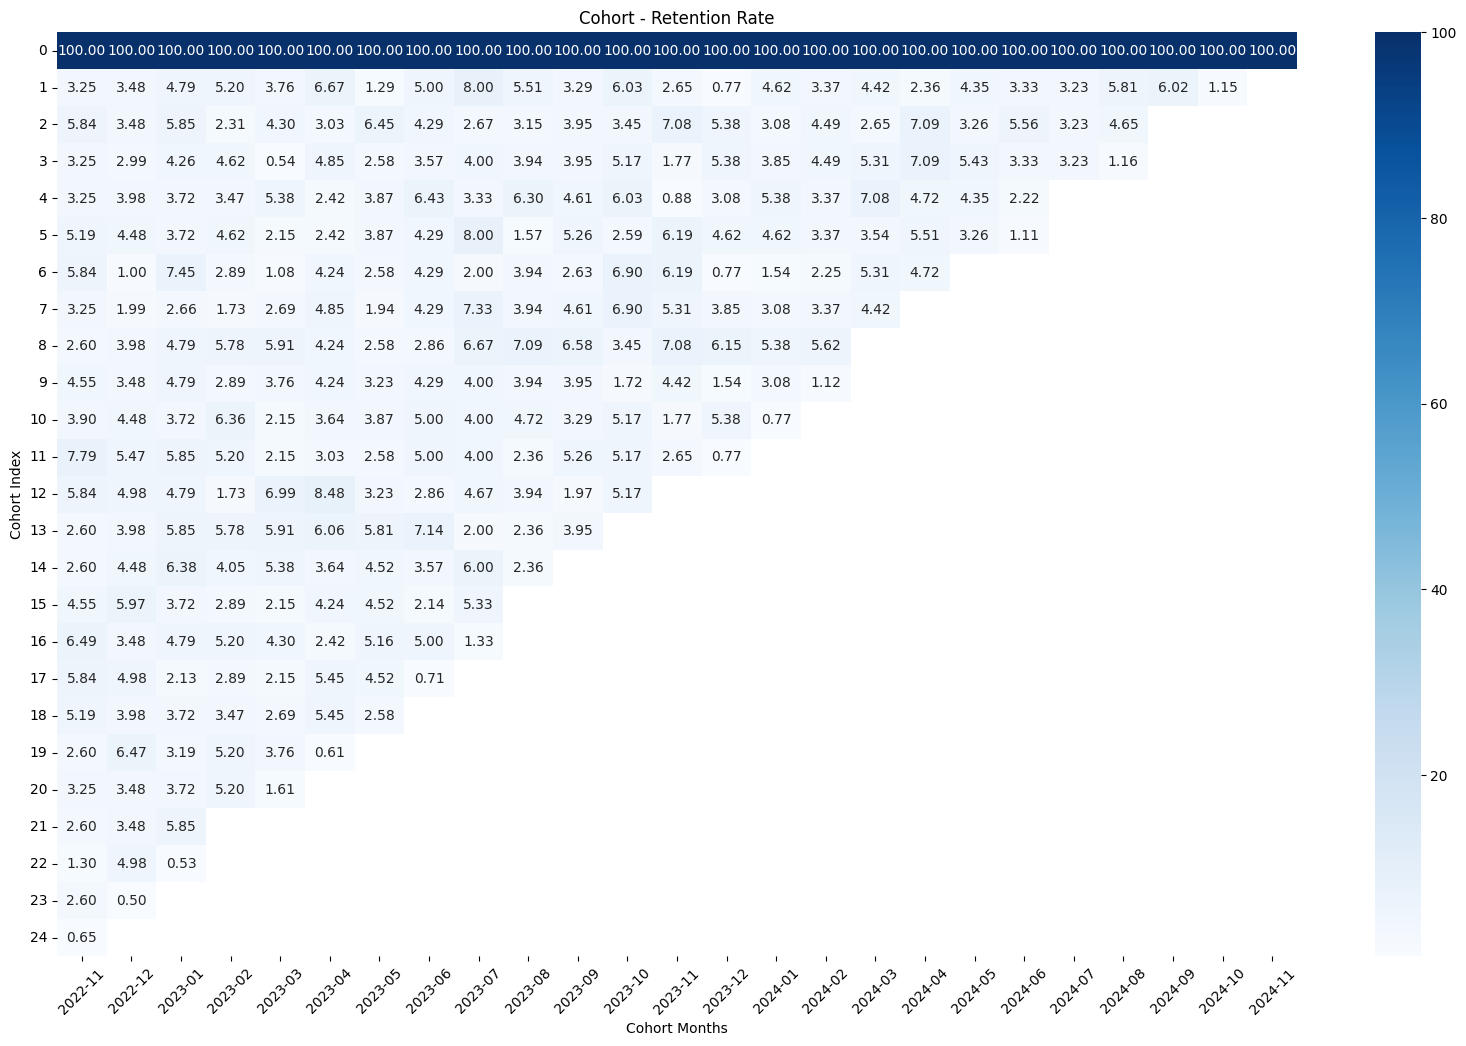

In [80]:
cohort_counts, cohort_percentage = cohort_analysis(sales_data, 'tarih', 'musteri_id')
plot_cohort_heatmap(cohort_percentage)

Prediction Model - Linear Regression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#Since the weekly total sales variables were defined in Task2, the same analysis was not performed again.
#In Task 2, weekly_total_sales was in Series state. Here it was assigned to a new variable using reset_index() to create a data frame.
weekly_sales = weekly_total_sales.reset_index()

#Add week_number column in weekly_sales
weekly_sales["week_number"] = range(1, len(weekly_sales) + 1)

#Checking the addition of week number column
print(weekly_sales.head()) 

       tarih  toplam_satis  week_number
0 2022-11-06     22,763.97            1
1 2022-11-13    283,830.07            2
2 2022-11-20    345,111.47            3
3 2022-11-27    336,645.23            4
4 2022-12-04    377,958.55            5


In [83]:
#Define independent and dependent variables
X = weekly_sales[["week_number"]]   #independent variable
y = weekly_sales["toplam_satis"]    #dependent variable

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
y_train = y_train.values  # y_train'ı 1D'ye dönüştür


In [85]:
#Check the dimensions of X_train and y_train
print(X_train.shape)  #It consists of 85 rows and 1 column. True, because model takes each row of X_train as feature.
print(y_train.shape)  #It consists of 85 rows. True, because y_train must be target variable

#Check data types of X_train and y_train
print(X_train.dtypes)  #X_train data type is object. It should be number because only numerical data can be used in the LinearRegression model.
print(y_train.dtype)   #y_train data type is object. It should be number because only numerical data can be used in the LinearRegression model.


(84, 1)
(84,)
week_number    int64
dtype: object
float64


In [86]:
X_train["week_number"] = X_train["week_number"].astype(int)  #Convert object to integer


In [87]:
print(X_train.dtypes)

week_number    int32
dtype: object


In [88]:
#Numpy array converted to Pandas series
y_train = pd.Series(y_train)

#Check null values
print(y_train.isna().sum())

0


In [89]:
#Fill null values with 0
y_train = y_train.fillna(0)     
print(y_train.dtype) 

float64


In [90]:
#Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make prediction
y_pred = model.predict(X_test)

#Evaluate model's accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 9725383991.79
R-squared (R²): -0.01
